# Handwritten Digit Recognition - Group 6

In [35]:
# Importing all the required libraries

import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import sklearn
from sklearn import metrics, svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, LinearSVC, NuSVC
import os
import PIL
import cv2
import glob
import numpy as np
from tkinter import *
from PIL import Image, ImageDraw, ImageGrab
from sklearn.decomposition import PCA
import numpy as np

In [36]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

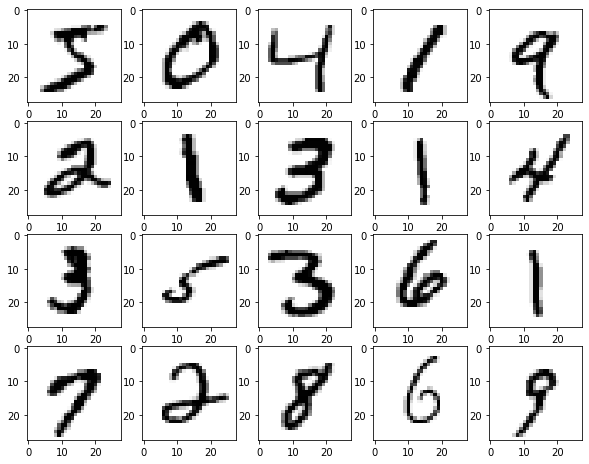

In [37]:
# Viewing the sample dataset (first 20)

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

plt.show()

In [38]:
# to check the Shape of the data 
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [39]:
# As the shape of data is (60000,28,28) which is a 3-D, but we need 4-Dimensional data for CNN(keras API). So we are reshaping the set to 4-D data and convert it to float.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [40]:
# Normalizing the data. Pixel gray scale value is between 0-255, so we will normalize the pixel values to 0-1 by divining it withh 255.
X_train /= 255
X_test /= 255

In [41]:
# Reshaping the data and implementing PCA on train and test data

X_train_1 = X_train.reshape((60000, -1))
y_train_1 = y_train.reshape((60000, -1))
X_test_1 = X_test.reshape((10000, -1))
y_test_1 = y_test.reshape((10000, -1))

pca = PCA(n_components=50)
pca.fit(X_train_1)
X_train_1 = pca.transform(X_train_1)
X_test_1 = pca.transform(X_test_1)

X_train_1.shape

(60000, 50)

In [42]:
# SVM Classifier implementation

classifier = OneVsRestClassifier(SVC(C=25, kernel='rbf', gamma=0.05, cache_size=4000, probability=False), n_jobs=24)
classifier.fit(X_train_1, y_train_1)

predicted = classifier.predict(X_train_1)
print("Train report of SVM: ")
print(metrics.classification_report(y_train_1, predicted))

predicted = classifier.predict(X_test_1)
print("Test report of SVM: ")
print(metrics.classification_report(y_test_1, predicted))

Train report of SVM: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

Test report of SVM: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99  

In [43]:
# Logistic Regression Implementaion 
lr_clf = LogisticRegression(solver='lbfgs', max_iter=4000)
lr_clf.fit(X_train_1, np.ravel(y_train_1, order= 'C'))

predicted = lr_clf.predict(X_train_1)
print("Train report of LR: ")
print(metrics.classification_report(y_train_1, predicted))

predicted = lr_clf.predict(X_test_1)
print("Test report of LR: ")
print(metrics.classification_report(y_test_1, predicted))

Train report of LR: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5923
           1       0.95      0.97      0.96      6742
           2       0.90      0.88      0.89      5958
           3       0.89      0.87      0.88      6131
           4       0.91      0.92      0.91      5842
           5       0.86      0.85      0.85      5421
           6       0.93      0.95      0.94      5918
           7       0.93      0.93      0.93      6265
           8       0.87      0.86      0.87      5851
           9       0.88      0.88      0.88      5949

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000

Test report of LR: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.91      0.88    

In [44]:
# KNN Implementation
knn_clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree', weights='distance', p=3, n_jobs=24)
knn_clf.fit(X_train_1, np.ravel(y_train_1, order= 'C'))

predicted = knn_clf.predict(X_train_1)
print("Train report of KNN:")
print(metrics.classification_report(y_train_1, predicted))

predicted = knn_clf.predict(X_test_1)
print("Test report of KNN : ")
print(metrics.classification_report(y_test_1, predicted))

Train report of KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

Test report of KNN : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98  

In [45]:
# Preprocess class labels for CNN by categorizing from 0-9
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
num_classes = y_test.shape[1]

In [46]:
# CNN model Implementation

def build_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [47]:
# fitting the CNN model
model=build_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 31s 44ms/step - loss: 0.6002 - accuracy: 0.8066 - val_loss: 0.0706 - val_accuracy: 0.9767
Epoch 2/10
600/600 [==============================] - 25s 42ms/step - loss: 0.0902 - accuracy: 0.9715 - val_loss: 0.0423 - val_accuracy: 0.9866
Epoch 3/10
600/600 [==============================] - 24s 39ms/step - loss: 0.0641 - accuracy: 0.9799 - val_loss: 0.0404 - val_accuracy: 0.9867
Epoch 4/10
600/600 [==============================] - 23s 39ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0311 - val_accuracy: 0.9896
Epoch 5/10
600/600 [==============================] - 24s 39ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0263 - val_accuracy: 0.9914
Epoch 6/10
600/600 [==============================] - 23s 39ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0304 - val_accuracy: 0.9893
Epoch 7/10
600/600 [==============================] - 24s 40ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.0249 - val_accuracy:

In [48]:
# Saving the model to model.h5 file and calculating test accuracy
model.save("model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0218 - accuracy: 0.9934


[0.02180013805627823, 0.993399977684021]

Predicted Number is :  7


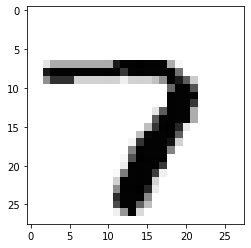

In [49]:
# Predicting the number by giving index of an image 
image_index = 4471
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
predict = X_test[image_index].reshape(28,28)
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Number is : ",pred.argmax())

### GUI Implementation

In [50]:
# Loading CNN model
model_cv = load_model("model.h5")
model_cv

In [51]:
# Creating window 
source=Tk()
source.resizable(0,0)
source.title("Handwritten Digits Recognition System")
initx, inity = None, None
image_number =0

In [52]:
# To clear draw area
def clear_source():
    global draw_area
    draw_area.delete("all")

In [53]:
# To start the session
def activate_event(event):
    global initx, inity
    draw_area.bind('<B1-Motion>', draw_lines)
    initx, inity = event.x, event.y

In [54]:
# to draw the digits and capture the area
def draw_lines(event):
    global initx, inity
    x, y = event.x, event.y
    draw_area.create_line((initx, inity, x, y), width=7, fill='black', capstyle=ROUND, smooth=True, splinesteps=12)
    initx, inity = x, y

In [55]:
# To recognize the digit drawn
def Recognize_Digit():
    global image_number
    filename=f'image_{image_number}.png'
    widget=draw_area
    x= source.winfo_rootx() + widget.winfo_x()
    y= source.winfo_rooty() + widget.winfo_y()
    x1=x+widget.winfo_width()
    y1=y+widget.winfo_height()
    ImageGrab.grab().crop((x,y,x1,y1)).save(filename)
    digit = cv2.imread(filename,cv2.IMREAD_COLOR)
    make_gray=cv2.cvtColor(digit.copy(),cv2.COLOR_BGR2GRAY)
    ret,th=cv2.threshold(make_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    contours=cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
    
    for cnt in contours:
        x,y,w,h=cv2.boundingRect(cnt)
        cv2.rectangle(digit,(x,y),(x+w,y+h),(255,0,0),1)
        top=int(5*th.shape[0])
        bottom=top
        left=int(5*th.shape[1])
        right=left
        roi=th[y-top:y+h+bottom+10,x-left:x+w+right]
        img=cv2.resize(roi,(28,28),interpolation=cv2.INTER_AREA)
        img=img.reshape(1,28,28,1)
        img=img/255.0
        prediction=model_cv.predict([img])[0]
        final=np.argmax(prediction)
        data=str(final)+'  '+str(int(max(prediction)*100))+'%'
        cv2.putText(digit,data,(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),1)
    cv2.imshow('Digit',digit)
    cv2.waitKey(0)

In [56]:
draw_area=Canvas(source, width=750, height=560, bg='white')
draw_area.grid(row=0, column=0, pady=2, sticky=W, columnspan=2)
draw_area.bind('<Button-1>', activate_event)
btn_save=Button(text="Recognize the Digit",fg='black',command=Recognize_Digit)
btn_save.grid(row=2,column=0,pady=1,padx=1)
butn_clear=Button(text="Clear",fg='black', command=clear_source)
butn_clear.grid(row=2,column=1,pady=1,padx=1)
source.mainloop()